In [4]:
import pickle
import string
from nltk import ngrams, FreqDist, word_tokenize
from numpy import arange
import matplotlib.pyplot as plt
from nltk.text import Text

In [5]:
def tokenize_it_all(sentence):
    # Remove punctuation and digits
    sentence = sentence.translate(str.maketrans('', '', string.punctuation + string.digits))
    return word_tokenize(sentence.lower())

In [6]:
def create_ngrams(sentence):
    unigram_dict = dict()
    bigram_dict = dict()
    
    sentence = tokenize_it_all(sentence)
    unigrams = list(ngrams(sentence, 1))
    bigrams = list(ngrams(sentence, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'))
    
    unigram_dist = FreqDist(unigrams)
    bigram_dist = FreqDist(bigrams)
    
    for k, v in unigram_dist.items():
        unigram_dict[' '.join(k)] = v
        
    for k, v in bigram_dist.items():
        bigram_dict[' '.join(k)] = v
        
    return unigram_dict,bigram_dict

---

In [7]:
sample_text = 'Oh, then, I see Queen Mab hath been with you.'
sample_uni,sample_bi = create_ngrams(sample_text)

In [8]:
print(sample_bi,"\n\n",sample_uni)

{'_ oh': 1, 'oh then': 1, 'then i': 1, 'i see': 1, 'see queen': 1, 'queen mab': 1, 'mab hath': 1, 'hath been': 1, 'been with': 1, 'with you': 1, 'you _': 1} 

 {'oh': 1, 'then': 1, 'i': 1, 'see': 1, 'queen': 1, 'mab': 1, 'hath': 1, 'been': 1, 'with': 1, 'you': 1}


In [9]:
file = 'resources/English_corpus.txt'
with open(file, encoding='utf8') as f:
        content = f.read().lower()
eng = content.replace('\n', '')
print(eng[:120])

approval of the minutes of the previous sitting the minutes of yesterday 's sitting have been distributed . are there an


In [10]:
unigram_english_dict,bigram_english_dict = create_ngrams(eng)
print(unigram_english_dict,"\n\n",bigram_english_dict)

{'approval': 3, 'of': 2769, 'the': 5699, 'minutes': 11, 'previous': 13, 'sitting': 11, 'yesterday': 15, 's': 244, 'have': 491, 'been': 193, 'distributed': 4, 'are': 571, 'there': 229, 'any': 98, 'comments': 9, 'mr': 371, 'president': 270, 'on': 865, 'monday': 11, 'i': 721, 'made': 61, 'a': 1343, 'point': 70, 'order': 76, 'about': 93, 'nicole': 1, 'fontaine': 4, 'reported': 2, 'in': 1668, 'british': 16, 'press': 13, 'regarding': 23, 'her': 51, 'recent': 12, 'visit': 6, 'with': 449, 'majesty': 1, 'queen': 3, 'elizabeth': 1, 'ii': 1, 'labour': 14, 'member': 111, 'this': 887, 'house': 49, 'miller': 2, 'repeated': 6, 'what': 132, 'were': 82, 'purported': 1, 'to': 2490, 'be': 620, 'remarks': 1, 'not': 525, 'once': 27, 'but': 240, 'three': 21, 'times': 11, 'tuesday': 8, 'and': 2040, 'wednesday': 2, 'he': 72, 'sought': 5, 'drag': 1, 'into': 78, 'political': 51, 'controversy': 2, 'use': 45, 'name': 16, 'score': 2, 'cheap': 7, 'points': 23, 'it': 694, 'may': 59, 'that': 1205, 'was': 163, 'unfami

In [14]:
bigram_english_dict.get('in the')

442

In [15]:
import operator
english_unigram_freqs = sorted(unigram_english_dict.items(), key=operator.itemgetter(1), reverse=True)
english_unigram_freqs[:10]

[('the', 5699),
 ('of', 2769),
 ('to', 2490),
 ('and', 2040),
 ('in', 1668),
 ('a', 1343),
 ('is', 1303),
 ('that', 1205),
 ('this', 887),
 ('on', 865)]

In [18]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

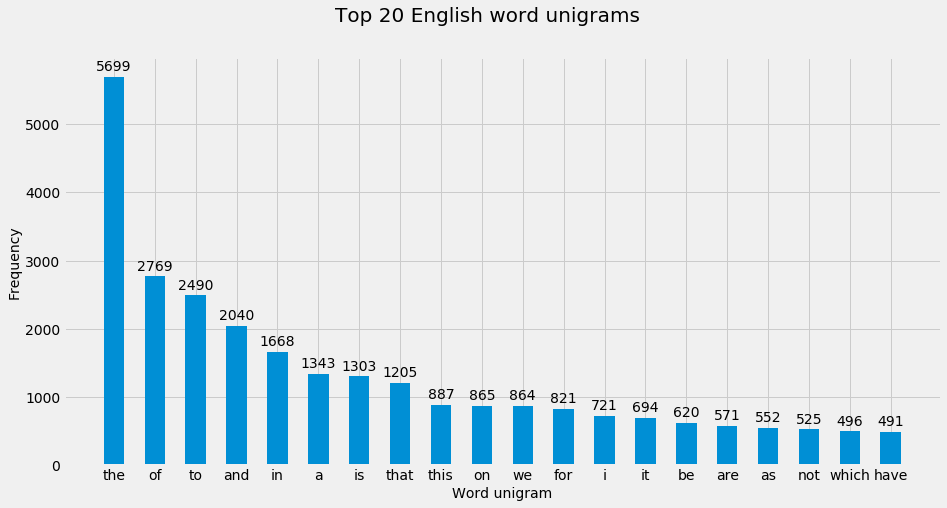

In [19]:
labels, values = zip(*english_unigram_freqs[:20])
indexes = arange(len(labels))
width = 0.5 # width = 1 would make the bars overlap

fig = plt.figure(figsize=(14,7))                                                               
ax = fig.gca() # Get current axis
rects = ax.bar(indexes, values, width)

# Add title and axis labels
fig.suptitle('Top 20 English word unigrams', fontsize=20)
plt.xlabel('Word unigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display value of each bar on bar
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 50 + height, '%d' % int(height), ha='center', va='bottom')

# Remove the default x-axis tick numbers and use tick numbers of your own choosing:
ax.set_xticks(indexes)
# Replace the tick numbers with strings:
ax.set_xticklabels(labels)

plt.show()

---
### All The functions in one go 

In [20]:
def get_ngram_count_dict(tokens, n):
    if n == 1:
        n_grams = ngrams(tokens, n)
    else:
        n_grams = ngrams(tokens, n, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_') # Fun fact: If I remove padding here and later when testing, and also remove the '_' from the unigram dicts, the accuracy rises slightly. However, it's not statistically significant due to the small size of the data.
    fdist = FreqDist(n_grams)
    ngram_dict = dict()
    for k,v in fdist.items():
        ngram_dict[' '.join(k)] = v
    return ngram_dict

# Calls get_ngram_count_dict to get a unigram and bigram dict from file.
def get_unigram_bigram_dicts(file):
    with open(file, encoding='utf8') as f:
        content = f.read()
    tokens = tokenize_it_all(content)
    unigram_dict = get_ngram_count_dict(tokens, 1)     
    bigram_dict = get_ngram_count_dict(tokens, 2)
    
    with open(file, encoding='utf8') as f:
        for i, l in enumerate(f):
            pass
    number_of_sents = i + 1

    print('\n NUMBER OF SENTENCES IN TRAINING DATA')
    print(f'{file} : ', number_of_sents)
    
    return (unigram_dict, bigram_dict)

# Dumps unigram and bigram dictionary of training data of given language to .pickle files.
def dump_pickle(language):
    file = 'resources/' + language + '_corpus.txt'
    unigram_dict, bigram_dict = get_unigram_bigram_dicts(file)
    with open('resources/' + language +  '.unigram.pickle', 'wb') as handle:
        pickle.dump(unigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL) # HIGHEST_PROTOCOL instructs pickle to use the highest protocol version available.
    with open('resources/' + language +  '.bigram.pickle', 'wb') as handle:
        pickle.dump(bigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
dump_pickle('English')
dump_pickle('French')
dump_pickle('Italian')


 NUMBER OF SENTENCES IN TRAINING DATA
resources/English_corpus.txt :  2980

 NUMBER OF SENTENCES IN TRAINING DATA
resources/French_corpus.txt :  2980

 NUMBER OF SENTENCES IN TRAINING DATA
resources/Italian_corpus.txt :  2821


In [28]:
with open('resources/English.unigram.pickle', 'rb') as handle:
    unigram_english_dict = pickle.load(handle)
    
with open('resources/English.bigram.pickle', 'rb') as handle:
    bigram_english_dict = pickle.load(handle)
    
with open('resources/French.unigram.pickle', 'rb') as handle:
    unigram_french_dict = pickle.load(handle)
    
with open('resources/French.bigram.pickle', 'rb') as handle:
    bigram_french_dict = pickle.load(handle)
    
with open('resources/Italian.unigram.pickle', 'rb') as handle:
    unigram_italian_dict = pickle.load(handle)
    
with open('resources/Italian.bigram.pickle', 'rb') as handle:
    bigram_italian_dict = pickle.load(handle)
    
vocabulary_size = len(unigram_english_dict) + len(unigram_french_dict) + len(unigram_italian_dict)
vocabulary_size

22705

In [29]:
# Get probability of given bigram belonging to the language which bigram_dict is in
def get_bigram_probability(bigram, first_word, bigram_dict, first_word_dict): # first_word is the first word of the word bigram.
    bigram_count = bigram_dict.get(bigram)
    if bigram_count is None:
        bigram_count = 0
    
    first_word_count = first_word_dict.get(first_word)
    if first_word_count is None:
        first_word_count = 0
    
    return (bigram_count + 1) / (first_word_count + vocabulary_size) # To get the logic of this formula, note how the proability is used in the function below. Without the + 1 in the Nr, if you find a bigram which is not in our known bigrams for a language, the probability of it being in that language would become 0. So we would like to assign a small probability of 1 / vocabulary_size in that case. Also note the arbitrariness of this 'probability'. We're saying "Given a bigram and a language, what is the probability that the bigram is of that language?" This is arbitrary because to get a meaningful probability we need to know which are the other languages considered and what their bigram frequencies are. That would be another way to do it, but arguable a worse one because it wouldn't be able to give a confidence score for a particular language. The formula just uses common sense to get to a number which works for the purposes. In the denominator, we have both first_word_count and vocabulary_size. Why? We have vocabulary_size for all langs in the denom because the larger this is, the less significant it is that for this particular language the bigram appears so many times. Could we have used a vocab_size of bigrams instead of unigrams? Sure, and the 'probabilities' would end up being much smaller numbers. What about first_word_count? This gives us a way to compare this bigram against other bigrams in this language starting with the same word. In general though, for a given bigram, it's more important to consider how many times it exists than to consider whether it is the usual bigram given a certain first word. The formula achieves that. Take the bigram 'le monseiur' and the English language. Let's say the bigram appears once and 'le' also appears once, while in French 'le monseiur' appears 100 times and le appears 100,000 times. Probability for English = (1 + 1) / (1 + 20,000) = 0.000099995. Probability for French = (100 + 1) / (100,000 + 20,000) = 0.00084166666. Note how the probability for French is still low because 100/100,000 is quite low and maybe it's not French after all if in French le is usually followed by other words. However, it's still significantly higher than the probability for English where both 'le' and 'le monseiur' only appear once.

# Get probability that a given bigram list is of a language (specified by its bigram_dict)
def get_language_probability(bigram_list, first_words, bigram_dict, first_word_dict):
    result = 1.0
    index = 0
    for bigram in bigram_list:
        result *= get_bigram_probability(bigram, first_words[index], bigram_dict, first_word_dict)
        index += 1
    return result

# Load correct solutions
solution_dict = dict()
with open('resources/LangId.sol.txt') as f:
    for line in f:
       (key, val) = line.split()
       solution_dict[int(key)] = val
        
line_no = 1
result_dict = dict()
correct = 0
incorrect_line_numbers = []

# This needs to be done because I'm using padding for bigrams so the unigram dicts in their raw forms can't be used in get_bigram_probability():
unigram_english_dict['_'] = 2980
unigram_french_dict['_'] = 2980
unigram_italian_dict['_'] = 2821

with open('resources/LangId.test.txt', encoding='utf8') as f:
    for line in f:
        tokens = tokenize_it_all(line)
        bigrams = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')
        bigram_list = [] # bigram_list will be exactly like bigrams but instead of [('_', 'this'), ...] it will be ['_ this', ...]. It is required because this is how bigrams are represented in the dictionary.
        first_words = [] # The first words of each bigram. This is the similar to making a unigram_list. We use it because we don't want something in the form [(this,), ...]. Also because we want this to include '_'. We want it to include '_' because we're not using the unigrams for classification but as part of a formula to judge bigram frequency based on the starting word.
        for b in bigrams:
            bigram_list.append(' '.join(b))
            first_words.append(b[0])
        
        english_prob = get_language_probability(bigram_list, first_words, bigram_english_dict, unigram_english_dict)
        french_prob = get_language_probability(bigram_list, first_words, bigram_french_dict, unigram_french_dict)
        italian_prob = get_language_probability(bigram_list, first_words, bigram_italian_dict, unigram_italian_dict)
        
        max_prob = max(english_prob, french_prob, italian_prob)
        if max_prob == english_prob:
            result_dict[line_no] = 'English'
        elif max_prob == french_prob:
            result_dict[line_no] = 'French'
        else:
            result_dict[line_no] = 'Italian'
        
        if solution_dict[line_no] == result_dict[line_no]:
            correct += 1
        else:
            incorrect_line_numbers.append(line_no)
            
        line_no += 1

# Storing results from result_dict to file:
with open('resources/LangId.result.txt', 'w') as f:
    for (key, val) in result_dict.items():
        f.write(' '.join([str(key), val]) + '\n')
        
print('Accuracy: {:2.2f}%'.format(correct * 100 / len(solution_dict)))

Accuracy: 98.00%


In [30]:
print('Line numbers for incorrectly classified languages: {}'.format(str(incorrect_line_numbers)))

Line numbers for incorrectly classified languages: [24, 87, 187, 191, 247, 279]


---
### Custom sentences

In [65]:
sent = "This is a sample test sentence."
sent_tokens = tokenize_it_all(sent)
sent_bigrams_pre = ngrams(sent_tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')

sent_bigrams = []
sent_bigrams_first_words = []
for b in sent_bigrams_pre:
    sent_bigrams.append(' '.join(b))
    sent_bigrams_first_words.append(b[0])
    
print('Sentence bigrams:', sent_bigrams)
print('Sentence bigrams first words:', sent_bigrams_first_words)

Sentence bigrams: ['_ this', 'this is', 'is a', 'a sample', 'sample test', 'test sentence', 'sentence _']
Sentence bigrams first words: ['_', 'this', 'is', 'a', 'sample', 'test', 'sentence']


In [66]:
sent_english_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_english_dict, unigram_english_dict)
sent_french_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_french_dict, unigram_french_dict)
sent_italian_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_italian_dict, unigram_italian_dict)

print("RAW 'PROBABILITIES'")
print('English:', sent_english_prob)
print('French:', sent_french_prob)
print('Italian:', sent_italian_prob)
# As we can see, these 'probabilities' are arbitrary. We can try to convert them to percentages since we are classifying only among these 3 languages:

RAW 'PROBABILITIES'
English: 6.559281902080034e-27
French: 2.7727840800012247e-31
Italian: 2.7325194857111067e-31


Let's make it more human readable, shall we?

In [67]:
def get_normalized_probabilities(list_of_probabilities):
    sum_of_probabilities = sum(list_of_probabilities)
    result = []
    for probability in list_of_probabilities:
        result.append(probability / sum_of_probabilities)
    return result

probabilities = [sent_english_prob, sent_french_prob, sent_italian_prob]
normalized_probabilities = get_normalized_probabilities(probabilities)

print('RELATIVE PROBABILITIES')
print('English: ', round(normalized_probabilities[0] * 100, 2), '%', sep='') # I use sep because I don't want a space before the % sign.
print('French: ', round(normalized_probabilities[1] * 100, 2), '%', sep='')
print('Italian: ', round(normalized_probabilities[2] * 100, 2), '%', sep='')

RELATIVE PROBABILITIES
English: 99.99%
French: 0.0%
Italian: 0.0%


In [68]:
sample_2 = "c'est un exemple de texte"

sent_tokens = tokenize_it_all(sample_2)
sent_bigrams_pre = ngrams(sent_tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')

sent_bigrams = []
sent_unigrams = []
for b in sent_bigrams_pre:
    sent_bigrams.append(' '.join(b))
    sent_unigrams.append(b[0])

In [69]:
sent_english_prob = get_language_probability(sent_bigrams, sent_unigrams, bigram_english_dict, unigram_english_dict)
sent_french_prob = get_language_probability(sent_bigrams, sent_unigrams, bigram_french_dict, unigram_french_dict)
sent_italian_prob = get_language_probability(sent_bigrams, sent_unigrams, bigram_italian_dict, unigram_italian_dict)

probabilities = [sent_english_prob, sent_french_prob, sent_italian_prob]
normalized_probabilities = get_normalized_probabilities(probabilities)

print('RELATIVE PROBABILITIES')
print('English: ', round(normalized_probabilities[0] * 100, 2), '%', sep='') # I use sep because I don't want a space before the % sign.
print('French: ', round(normalized_probabilities[1] * 100, 2), '%', sep='')
print('Italian: ', round(normalized_probabilities[2] * 100, 2), '%', sep='')

RELATIVE PROBABILITIES
English: 12.97%
French: 74.5%
Italian: 12.53%


---

> This is just a very very very small test case and the model is very very raw


Thank You!